In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit, differential_evolution
import csv
from data_read import data_read
from rebinning import rebinning
from fit import fit
from get_rates import get_rates
from get_bkg import get_bkg

In [2]:
x = np.array([1173.2,1332.5,661.7,511.0,1274.5,569.7,1063.7])
y1 = np.array([3070.0,3448.8,1753.45,1363.984,3283.4,1535.08,2778.1])
sy1 = np.array([78.5,91.5,68.19,58.2,88.1,59.27,80.4])
y2 = np.array([3033.0,3425.2,1720.40,1351.96,3268.9,1504.85,2746.0])
sy2 = np.array([68.4,77.8,64.67,53.20,84.6,57.20,75.6])

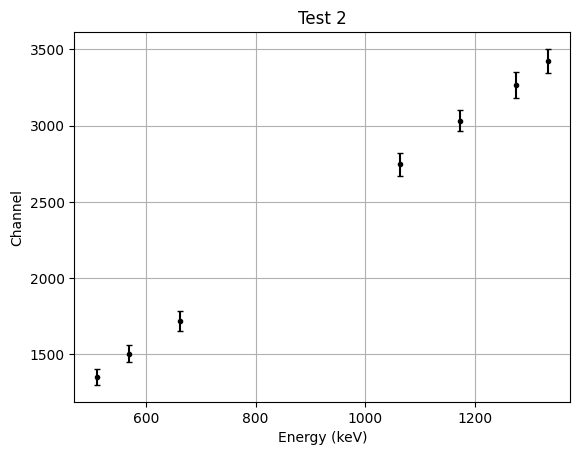

In [14]:
plt.errorbar(x, y2, yerr=sy2,capsize=2,fmt='.',c="black")
plt.title('Test 2')
plt.xlabel('Energy (keV)')
plt.ylabel('Channel')
plt.grid()

plt.show()

In [15]:
def func(x,*p):
    return (p[0] + p[1]*x)
    

In [16]:
res_param, res_xi2, res_cov = fit(x,y2,sy2,func,[100,2])

In [17]:
print(res_param)
print(res_xi2)

[60.88055587  2.5248355 ]
0.014913143727126302


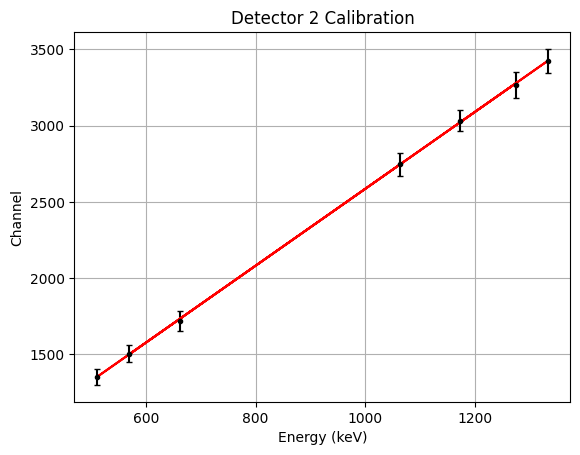

In [23]:
plt.grid()
plt.xlabel('Energy (keV)')
plt.ylabel('Channel')
plt.title('Detector 2 Calibration')
plt.errorbar(x, y2, yerr=sy2,capsize=2,fmt='.',c="black",label='Data')
plt.plot(x, func(x,*res_param), 'r-', label='Fit')
# plt.savefig('./Plots/Calibracion/CalDetector2.png')
plt.show()

In [19]:
N = 2

In [20]:
for i in range(N):
    print('p'+str(i)+' = '+str(res_param[i]))
    # print(str(res_param[i]))

p0 = 60.880555871641135
p1 = 2.5248354966468525


In [21]:
for i in range(N):
    print('s(p'+str(i)+') = '+str(np.sqrt(res_cov[i,i])))
    # print(str(np.sqrt(res_cov[i,i])))

s(p0) = 8.567410777158363
s(p1) = 0.00944880907297786
